<a href="https://colab.research.google.com/github/RojaCM/Complete-Python-3-Bootcamp/blob/master/DBSCAN_DEX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
data=pd.read_csv('sample_dex_data.csv')

In [ ]:
data.head()

,Unnamed: 0,title,summary,category
0,0,Reminder - Optimus - Best People Manager 2022,Today is the last day for voting (14th October...,TWEETS
1,1,"It starts this 23 October, till 26 October 202...",Hope you are all set to attend Money 2020 USA ...,TWEETS
2,2,Congratulations Triveni Arun Bhalerao | Long S...,NaN,WHO_SAID_WHAT
3,3,Long Service Awards - 5 years - Triveni Arun ...,NaN,STORY_OF_THE_DAY
4,4,tweets testing,today testing preview screen and toast success...,TWEETS


In [ ]:
df1=data[['title']]

In [ ]:
df1.head()

,title
0,Reminder - Optimus - Best People Manager 2022
1,"It starts this 23 October, till 26 October 202..."
2,Congratulations Triveni Arun Bhalerao | Long S...
3,Long Service Awards - 5 years - Triveni Arun ...
4,tweets testing


#Steps to clean the data
Punctuation Removal: 

In [ ]:
#library that contains punctuation
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   993 non-null    object
dtypes: object(1)
memory usage: 7.9+ KB


In [ ]:
import re

In [ ]:
df1.isnull().sum()

title    7
dtype: int64

In [ ]:
df1.shape

(1000, 1)

In [ ]:
df3=df1.copy()

In [ ]:
df3

,title
0,Reminder - Optimus - Best People Manager 2022
1,"It starts this 23 October, till 26 October 202..."
2,Congratulations Triveni Arun Bhalerao | Long S...
3,Long Service Awards - 5 years - Triveni Arun ...
4,tweets testing
...,...
995,"Employee Referral Virtual Drive - 14 May, 2022"
996,The Future Trends In Mobility And Transportation
997,The Keys to Pricing Power as Recession Looms
998,Intelligence and unified data governance in th...


In [65]:
def custom_encoder(data):
  data.replace(to_replace='TWEETS',value=1,inplace=True)
  data.replace(to_replace='COMPANY_INFORMATION',value=2,inplace=True)
  data.replace(to_replace='STORY_OF_THE_DAY',value=3,inplace=True)
  data.replace(to_replace='TECHNO_PICKS',value=4,inplace=True)
  data.replace(to_replace='INDUSTRY_UPDATE',value=5,inplace=True)
  data.replace(to_replace='WHO_SAID_WHAT',value=6,inplace=True)
  data.replace(to_replace='FEATURED_VIDEOS',value=7,inplace=True)
  data.replace(to_replace='SUCCESS_STORY',value=8,inplace=True)
  data.replace(to_replace='PEOPLE_OF_ALTIMETRIK',value=9,inplace=True)
  data.replace(to_replace='ALTIMETRIK_NEWS',value=10,inplace=True)
  data.replace(to_replace='EMPLOYEE_EXPERIENCES',value=11,inplace=True)
  data.replace(to_replace='ABOUT_ALTIMETRIK',value=12,inplace=True)
  data.replace(to_replace='CAPABILITY_CENTERS',value=13,inplace=True)
  data.replace(to_replace='GLOBAL_RECOGNITIONS',value=14,inplace=True)
  data.replace(to_replace='INNOVATION_AT_ALTIMETRIK',value=15,inplace=True)
  data.replace(to_replace='TRENDING_STORY',value=16,inplace=True)
  data.replace(to_replace='EBOOK',value=17,inplace=True)
  data.replace(to_replace='STATIC_CONTENT',value=18,inplace=True)
  data.replace(to_replace='DIGITAL_BUSINESS',value=19,inplace=True)

In [67]:
custom_encoder(data['category'])

In [68]:
data

,Unnamed: 0,title,summary,category
0,0,Reminder - Optimus - Best People Manager 2022,Today is the last day for voting (14th October...,1
1,1,"It starts this 23 October, till 26 October 202...",Hope you are all set to attend Money 2020 USA ...,1
2,2,Congratulations Triveni Arun Bhalerao | Long S...,NaN,6
3,3,Long Service Awards - 5 years - Triveni Arun ...,NaN,3
4,4,tweets testing,today testing preview screen and toast success...,1
...,...,...,...,...
995,995,"Employee Referral Virtual Drive - 14 May, 2022",NaN,2
996,996,The Future Trends In Mobility And Transportation,NaN,5
997,997,The Keys to Pricing Power as Recession Looms,NaN,5
998,998,Intelligence and unified data governance in th...,NaN,4


In [14]:
df3.dropna(inplace=True)

In [69]:
df3['category']=data['category']

In [16]:
#defining the function to remove punctuation
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    punctuationfree_lower=punctuationfree.lower()
    return punctuationfree_lower
#storing the puntuation free text
df3['clean_title']= df3['title'].apply(lambda x: remove_punctuation(x))
df3.head()

,title,clean_title
0,Reminder - Optimus - Best People Manager 2022,reminder optimus best people manager 2022
1,"It starts this 23 October, till 26 October 202...",it starts this 23 october till 26 october 2022...
2,Congratulations Triveni Arun Bhalerao | Long S...,congratulations triveni arun bhalerao long se...
3,Long Service Awards - 5 years - Triveni Arun ...,long service awards 5 years triveni arun bh...
4,tweets testing,tweets testing


In [17]:
df4=df3.copy()

In [34]:
# #defining function for tokenization
# import re
# def tokenization(text):
#     tokens = re.split(' ',text)
#     return tokens
# #applying function to the column
# df3['title_tokenied']= df3['clean_title'].apply(lambda x: tokenization(x))

In [39]:
df3.drop(['title_tokenied'],axis=1,inplace=True)

In [40]:
df3.head()

,title,clean_title
0,Reminder - Optimus - Best People Manager 2022,reminder optimus best people manager 2022
1,"It starts this 23 October, till 26 October 202...",it starts this 23 october till 26 october 2022...
2,Congratulations Triveni Arun Bhalerao | Long S...,congratulations triveni arun bhalerao long se...
3,Long Service Awards - 5 years - Triveni Arun ...,long service awards 5 years triveni arun bh...
4,tweets testing,tweets testing


In [41]:
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [42]:
#lets create an object of lemmatizer
lm=WordNetLemmatizer()

In [43]:
def text_transformation(df_col):
  corpus=[]
  for i in df_col:
    new_item=re.sub('[^a-zA-Z]',' ',str(i))
    new_item=new_item.lower()
    new_item=new_item.split()
    new_item=[lm.lemmatize(j) for j in new_item if j not in set(stopwords.words('english'))]
    corpus.append(' '.join(str(x) for x in new_item))
  return corpus

In [46]:
corpus=text_transformation(df3['clean_title'])

In [45]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [47]:
corpus

['reminder optimus best people manager',
 'start october till october would like invite visit booth quick catchup excited looking forward great conversation',
 'congratulation triveni arun bhalerao long service award year',
 'long service award year triveni arun bhalerao',
 'tweet testing',
 'tech live session istio service mesh',
 'ensuring product co creation customer',
 'tweet image size testing',
 'long service award year shilpa jain',
 'employee referral virtual drive may',
 'wellness session summer health choice',
 'marcus evans digital business recipe unlock unlimited growth potential',
 'risk management strategy combat fraudsters',
 'trend digital business conversation raj v executive chairman',
 'world food day leave one behind',
 'test tweet',
 'yield forecasting planning platform leading food industry',
 'ensuring product co creation customer',
 'ensuring product co creation customer',
 'ensuring product co creation customer',
 'predict gptw ranking',
 'altimetrik money',
 '

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [49]:
vec=TfidfVectorizer()

In [53]:
corpus_matrix=vec.fit_transform(corpus)

In [54]:
corpus_matrix

<993x1545 sparse matrix of type '<class 'numpy.float64'>'
	with 4962 stored elements in Compressed Sparse Row format>

In [52]:
print("Feature Names n",vec.get_feature_names_out())

Feature Names n ['aamitt' 'abhirami' 'ability' ... 'yield' 'yndnsgjskye' 'zero']


In [55]:
print("Sparse Matrix n",corpus_matrix.shape,"n",corpus_matrix.toarray())

Sparse Matrix n (993, 1545) n [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


DBSCAN

In [56]:
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.metrics import v_measure_score

In [57]:
traindata=corpus_matrix

Applying Sklearn DBSCAN Clustering with default parameters

In [58]:
dbscan_cluster1 = DBSCAN()
dbscan_cluster1.fit(traindata)

DBSCAN()

In [59]:
# Number of Clusters
labels=dbscan_cluster1.labels_

In [60]:
labels

array([-1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        0,  0,  0, -1, -1, -1, -1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1,  1, -1,  1,
       -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  2,  2,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

In [61]:
# Number of Clusters
n_clusters=len(set(labels))-(1 if -1 in labels else 0)

In [62]:
n_clusters


10

In [63]:
# Identify Noise
n_noise=list(dbscan_cluster1.labels_).count(-1)

In [64]:
n_noise

886

In [71]:
# Calculating v_measure
print('v_measure =', v_measure_score(df3['category'],labels))

v_measure = 0.1532142874698278


Applying DBSCAN with eps = 0.1 and min_samples = 8

In [72]:
dbscan_cluster = DBSCAN(eps=0.1, min_samples=8)
dbscan_cluster.fit(traindata)

DBSCAN(eps=0.1, min_samples=8)

In [76]:
# Number of Clusters
labels=dbscan_cluster.labels_
labels

array([-1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        0,  0,  0, -1, -1, -1, -1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1,  1,
       -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  2,  2,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

In [77]:
# Number of Clusters
n_clusters=len(set(labels))-(1 if -1 in labels else 0)
n_clusters

5

In [79]:
# Identify Noise
n_noise=list(dbscan_cluster.labels_).count(-1)
n_noise

917

In [80]:
# Calculating v_measure
print('v_measure =', v_measure_score(df3['category'],labels))

v_measure = 0.10053354620108265


Finding the Optimal value of Epsilon

In [84]:
import numpy as np
from sklearn.neighbors import NearestNeighbors

nearest_neighbors = NearestNeighbors(n_neighbors=11)
neighbors = nearest_neighbors.fit(traindata)

distances, indices = neighbors.kneighbors(traindata)
distances = np.sort(distances[:,10], axis=0)

In [85]:
distances

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.41575579, 0.56378781, 0.56378781,
       0.56378781, 0.56378781, 0.56378781, 0.56378781, 0.56378

Text(0, 0.5, 'Distance')

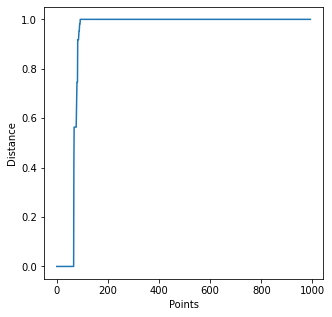

In [88]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(5, 5))
plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("Distance")

Identifying Elbow Point with Kneed Package 
To determine the location of maximum curvature visually can be difficult. Hence, a Python package called kneed can be used to detect the knee or elbow point. 
This can be installed with ‘pip install kneed’

In [89]:
pip install kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [90]:
from kneed import KneeLocator

i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')

In [91]:
print(distances[knee.knee])

1.0000000000000002


In [93]:
#Applying DBSCAN with Optimal value of Epsilon = 1
dbscan_cluster2 = DBSCAN(eps=1, min_samples=8)
dbscan_cluster2.fit(traindata)

DBSCAN(eps=1, min_samples=8)

In [98]:
# Number of Clusters
labels1=dbscan_cluster2.labels_
labels1

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0, -1,  0,
        0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
       -1,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0

In [99]:
# Number of Clusters
n_clusters=len(set(labels1))-(1 if -1 in labels else 0)
n_clusters

1

In [100]:
# Identify Noise
n_noise=list(dbscan_cluster2.labels_).count(-1)
n_noise

84

In [101]:
# Calculating v_measure
print('v_measure =', v_measure_score(df3['category'], labels))

v_measure = 0.00896867629958185
